In [277]:
import numpy as np
import pandas as pd

In [278]:
#Importing train and test data sets
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## Explaratory Data Analysis (EDA)

In [279]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [280]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [281]:
test.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [282]:
train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

### Exploring NAN values

In [283]:
#Importing the plotting libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import seaborn as sns

In [284]:
from my_Functs import null_vals_prct

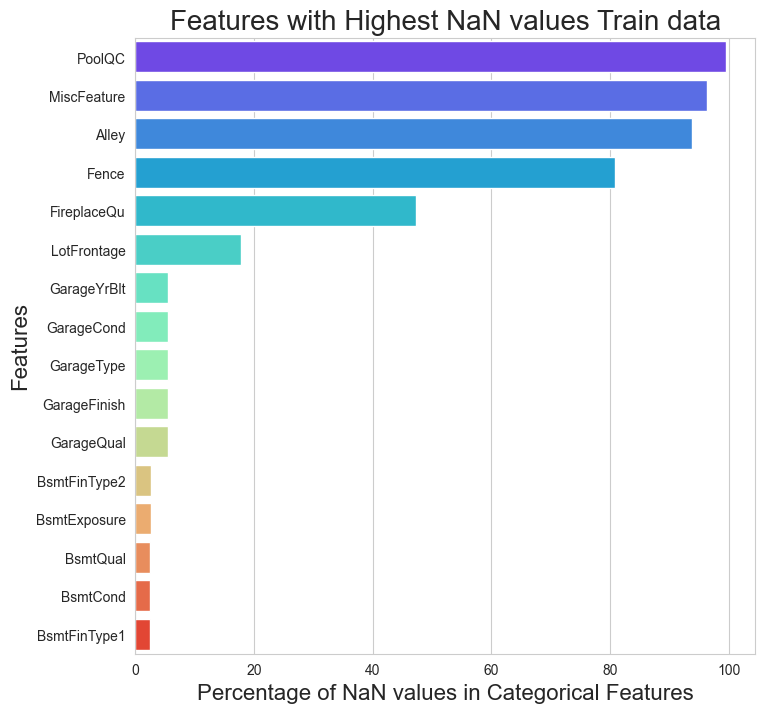

We can remove features with NaN values that are more than 10%.


In [285]:
#Calculating the percentage of nan_values in train dataset
features = null_vals_prct(train).Features
nan_Prcnt = null_vals_prct(train).NaN_Prcnt

#Plotting
plt.figure(figsize=(8,8))
plt.title('Features with Highest NaN values Train data', size = 20)
sns.barplot(x = nan_Prcnt, y = features, palette = 'rainbow')
plt.xlabel("Percentage of NaN values in Categorical Features", size = 16)
plt.ylabel("Features", size = 16)
plt.show()
print('We can remove features with NaN values that are more than 10%.')

In [286]:
null_vals_prct(train)

,Features,NaN_Prcnt
72,PoolQC,99.520548
74,MiscFeature,96.301370
6,Alley,93.767123
73,Fence,80.753425
57,FireplaceQu,47.260274
3,LotFrontage,17.739726
59,GarageYrBlt,5.547945
64,GarageCond,5.547945
58,GarageType,5.547945
60,GarageFinish,5.547945


In [287]:
train = train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis=1)

In [288]:
null_vals_prct(train)

,Features,NaN_Prcnt
55,GarageType,5.547945
61,GarageCond,5.547945
56,GarageYrBlt,5.547945
57,GarageFinish,5.547945
60,GarageQual,5.547945
33,BsmtFinType2,2.602740
30,BsmtExposure,2.602740
31,BsmtFinType1,2.534247
29,BsmtCond,2.534247
28,BsmtQual,2.534247


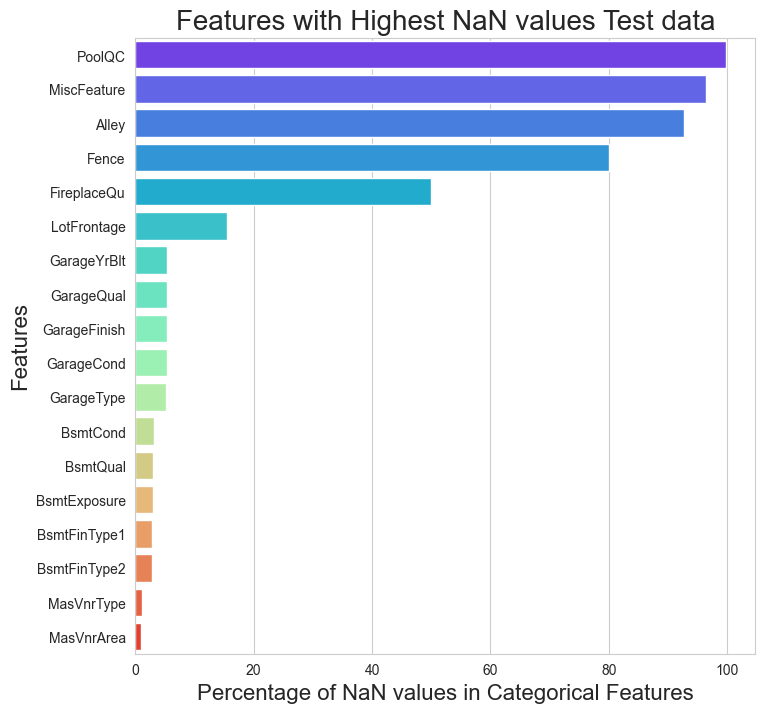

We can remove features with NaN values that are more than 10%.


In [289]:
#Calculating the percentage of nan_values in test dataset
features = null_vals_prct(test).Features
nan_Prcnt = null_vals_prct(test).NaN_Prcnt

#Plotting
plt.figure(figsize=(8,8))
plt.title('Features with Highest NaN values Test data', size = 20)
sns.barplot(x = nan_Prcnt, y = features, palette = 'rainbow')
plt.xlabel("Percentage of NaN values in Categorical Features", size = 16)
plt.ylabel("Features", size = 16)
plt.show()
print('We can remove features with NaN values that are more than 10%.')

In [290]:
null_vals_prct(test)

,Features,NaN_Prcnt
72,PoolQC,99.794380
74,MiscFeature,96.504455
6,Alley,92.666210
73,Fence,80.123372
57,FireplaceQu,50.034270
3,LotFrontage,15.558602
59,GarageYrBlt,5.346127
63,GarageQual,5.346127
60,GarageFinish,5.346127
64,GarageCond,5.346127


In [291]:
test = test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'], axis=1)

In [292]:
null_vals_prct(test)

,Features,NaN_Prcnt
56,GarageYrBlt,5.346127
57,GarageFinish,5.346127
60,GarageQual,5.346127
61,GarageCond,5.346127
55,GarageType,5.209047
29,BsmtCond,3.084304
30,BsmtExposure,3.015764
28,BsmtQual,3.015764
31,BsmtFinType1,2.878684
33,BsmtFinType2,2.878684


In [293]:
print(train.columns[train.isnull().any()])
print(test.columns[test.isnull().any()])

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')
Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')


 We notice here that the variables with low null values percentage are either related to having basement or not and having garage or not so we will be checking if these are real null values else we will be introducing new categorigal variables : garage, no_garage, bsmt, no_bsmt

In [294]:
filter_Bsmt = [col for col in train if col.startswith('Bsmt')]
filter_Bsmt

['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [301]:
#Indentifying false basement values in train dataset
s = 0
print('<Shows null values - False if not-null>\n')
print('Count\tNumber\tBsmtQual\tBsmtExposure\tBsmtFinType1\tBsmtFinType2\tBsmtCond ')
for i in range(len(train)):
    if train['BsmtExposure'].isnull()[i] or train['BsmtFinType2'].isnull()[i]== True:
        if train['BsmtQual'].isnull()[i]== False:
            s+=1
            print(s,'\t', i,'\t', train['BsmtQual'].isnull()[i],'\t\t',
                  train['BsmtExposure'].isnull()[i], '\t\t', train['BsmtFinType1'].isnull()[i],
               '\t\t', train['BsmtFinType2'].isnull()[i],'\t\t', train['BsmtCond'].isnull()[i])

<Shows null values - False if not-null>

Count	Number	BsmtQual	BsmtExposure	BsmtFinType1	BsmtFinType2	BsmtCond 
1 	 332 	 False 		 False 		 False 		 True 		 False
2 	 948 	 False 		 True 		 False 		 False 		 False


As it is evident from the index value of 332 and 948, that there is an inconsistency as the whole row should be null or not-null, meaning that if the data shows no basement so other values related to basement should be no basement too.

In [305]:
train.drop([332,948], axis=0, inplace=True)

In [300]:
#Indentifying false basement values in test dataset
s = 0
print('<Shows null values - False if not-null>\n')
print('Count\tNumber\tBsmtQual\tBsmtExposure\tBsmtFinType1\tBsmtFinType2\tBsmtCond ')
for i in range(len(test)):
    if test['BsmtExposure'].isnull()[i] or test['BsmtFinType2'].isnull()[i]== True:
        if test['BsmtQual'].isnull()[i]== False:
            s+=1
            print(s,'\t', i,'\t', test['BsmtQual'].isnull()[i],'\t\t',
                  test['BsmtExposure'].isnull()[i], '\t\t', test['BsmtFinType1'].isnull()[i],
               '\t\t', test['BsmtFinType2'].isnull()[i],'\t\t', test['BsmtCond'].isnull()[i])

<Shows null values - False if not-null>

Count	Number	BsmtQual	BsmtExposure	BsmtFinType1	BsmtFinType2	BsmtCond 
1 	 27 	 False 		 True 		 False 		 False 		 False
2 	 888 	 False 		 True 		 False 		 False 		 False


As it is evident from the index value of 27 and 888, that there is an inconsistency as the whole row should be null or not-null, meaning that if the data shows no basement so other values related to basement should be no basement too.


In [307]:
train.drop([27,888], axis=0, inplace=True)

In [295]:
filter_Garage = [col for col in train if col.startswith('Garage')]
filter_Garage

['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [304]:
#Indentifying false Garage values in test dataset
s = 0
print('Count\tNumber\GarageQual\tBsmtExposure\tBsmtFinType1\tBsmtFinType2\tBsmtCond ')
for i in range(len(test)):
    if test['BsmtExposure'].isnull()[i] or test['BsmtFinType2'].isnull()[i]== True:
        if test['GarageQual'].isnull()[i]== False:
            s+=1
            print(s,'\t', i,'\t', test['GarageQual'].isnull()[i],'\t\t',
                  test['BsmtExposure'].isnull()[i], '\t\t', test['BsmtFinType1'].isnull()[i],
               '\t\t', test['BsmtFinType2'].isnull()[i],'\t\t', test['BsmtCond'].isnull()[i])

Count	Number\GarageQual	BsmtExposure	BsmtFinType1	BsmtFinType2	BsmtCond 
1 	 27 	 False 		 True 		 False 		 False 		 False
2 	 125 	 False 		 True 		 True 		 True 		 True
3 	 269 	 False 		 True 		 True 		 True 		 True
4 	 318 	 False 		 True 		 True 		 True 		 True
5 	 354 	 False 		 True 		 True 		 True 		 True
6 	 388 	 False 		 True 		 True 		 True 		 True
7 	 396 	 False 		 True 		 True 		 True 		 True
8 	 397 	 False 		 True 		 True 		 True 		 True
9 	 398 	 False 		 True 		 True 		 True 		 True
10 	 400 	 False 		 True 		 True 		 True 		 True
11 	 455 	 False 		 True 		 True 		 True 		 True
12 	 590 	 False 		 True 		 True 		 True 		 True
13 	 606 	 False 		 True 		 True 		 True 		 True
14 	 608 	 False 		 True 		 True 		 True 		 True
15 	 660 	 False 		 True 		 True 		 True 		 True
16 	 662 	 False 		 True 		 True 		 True 		 True
17 	 728 	 False 		 True 		 True 		 True 		 True
18 	 756 	 False 		 True 		 True 		 True 		 True
19 	 764 	 False 		 True 		 True 		 True 		 True
20 